# CNN Autoencoder
---

In [7]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
x_train = x_train / 255.
x_test = x_test / 255. 

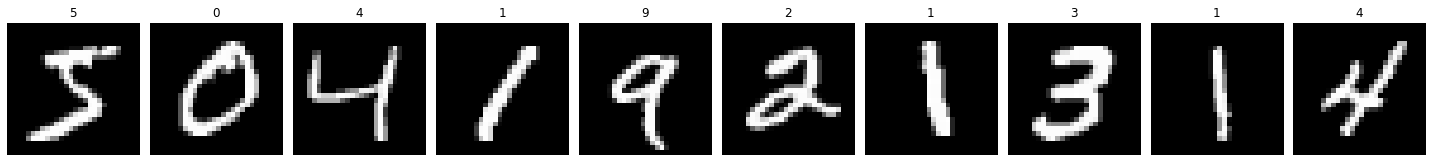

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20,6), tight_layout=True)

for i in range(10):
  ax[i].imshow(x_train[i], cmap='gray')
  ax[i].set_title(y_train[i])
  ax[i].axis('off')

In [12]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [13]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid', name='encoded'),

    tf.keras.layers.UpSampling2D(size=(2,2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.UpSampling2D(size=(2,2)),
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(1,1), padding='same', activation='sigmoid', name='decoded'),
])

2021-11-17 23:12:40.731327: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 encoded (MaxPooling2D)      (None, 7, 7, 8)           0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        1

In [15]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
history = cnn_model.fit(x_train, x_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 36s 76ms/step - loss: 0.1533 - val_loss: 0.0863
Epoch 2/10
469/469 [==============================] - 34s 71ms/step - loss: 0.0839 - val_loss: 0.0806
Epoch 3/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0802 - val_loss: 0.0782
Epoch 4/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0784 - val_loss: 0.0770
Epoch 5/10
469/469 [==============================] - 29s 63ms/step - loss: 0.0773 - val_loss: 0.0760
Epoch 6/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0764 - val_loss: 0.0753
Epoch 7/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0758 - val_loss: 0.0748
Epoch 8/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0752 - val_loss: 0.0742
Epoch 9/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0748 - val_loss: 0.0738
Epoch 10/10
469/469 [==============================] - 33s 71ms/step - loss: 0.074

Text(0.5, 0, 'Epochs')

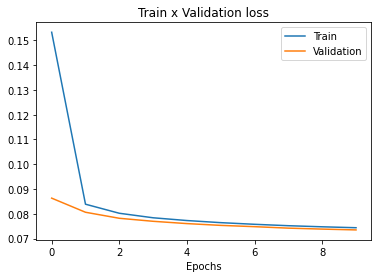

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Train', 'Validation'])
plt.title('Train x Validation loss')
plt.xlabel('Epochs')

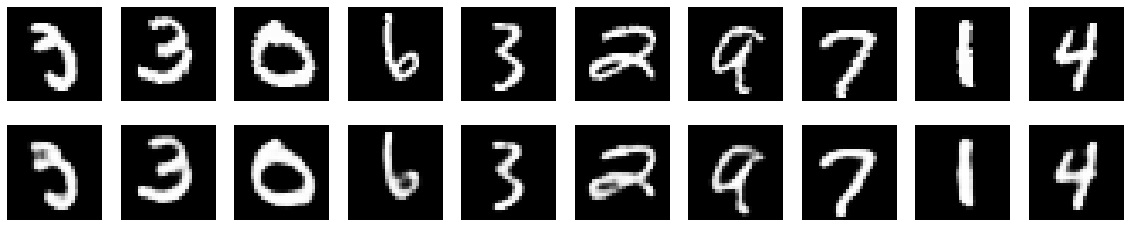

In [18]:
n_imgs = 10
random_imgs = np.random.choice(range(x_test.shape[0]), size=n_imgs)
img_true = x_test[random_imgs]
img_pred = cnn_model.predict(img_true)

plt.figure(figsize=(20, 4))
for i in range(n_imgs):
  plt.subplot(2, n_imgs, i + 1)
  plt.imshow(img_true[i].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(2, n_imgs, i + 1 + n_imgs)
  plt.imshow(img_pred[i].reshape(28, 28), cmap='gray')
  plt.axis('off')

## Information Retrieval

In [109]:
encoder = tf.keras.models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer(name='encoded').output)
x_test_encoded = encoder.predict(x_test)

In [110]:
x_test_encoded.shape

(10000, 7, 7, 8)

In [111]:
encodings = x_test_encoded.reshape(x_test_encoded.shape[0], -1)

In [112]:
encodings.shape

(10000, 392)

In [119]:
encodings

array([[0.8616288 , 0.6689726 , 0.        , ..., 0.86365795, 0.963325  ,
        0.        ],
       [0.8616288 , 0.6689726 , 0.        , ..., 0.86365795, 1.4791193 ,
        0.11714597],
       [0.8616288 , 0.6689726 , 0.        , ..., 0.86365795, 0.963325  ,
        0.        ],
       ...,
       [0.8616288 , 0.6689726 , 0.        , ..., 0.86365795, 0.963325  ,
        0.        ],
       [0.8616288 , 0.6689726 , 0.        , ..., 0.86365795, 0.963325  ,
        0.        ],
       [0.8616288 , 0.6689726 , 0.        , ..., 0.86365795, 0.963325  ,
        0.        ]], dtype=float32)

In [113]:
retriever = NearestNeighbors(n_neighbors=10, n_jobs=-1)
retriever.fit(encodings)

NearestNeighbors(n_jobs=-1, n_neighbors=10)

In [120]:
img_idx = np.random.choice(range(x_test.shape[0]), size=1)
distances, indices = retriever.kneighbors(encodings[img_idx])

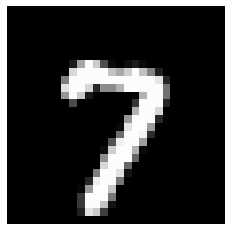

In [121]:
plt.figure(figsize=(10,4))
plt.imshow(x_test[img_idx].squeeze(), cmap='gray')
plt.axis('off');

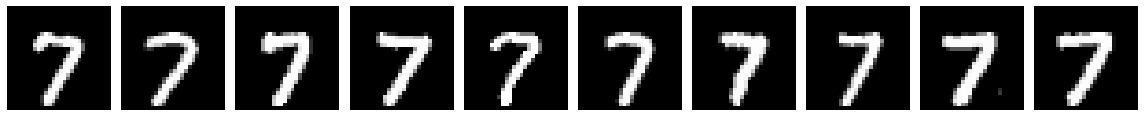

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=indices.shape[1], figsize=(16, 6), tight_layout=True)

for idx, img_idx in enumerate(indices[0]):
    ax[idx].imshow(x_test[img_idx].squeeze(), cmap='gray')
    ax[idx].axis('off')